# Qiskit: گیت‌های تک‌کیوبیتی

In [ ]:
# Don't run this cell if you're inside phanous' jupyterhub.

!pip install matplotlib
!pip install pylatexenc
!pip install qiskit

In [8]:
from qiskit import QuantumCircuit, assemble, Aer
import numpy as np
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram, array_to_latex
import warnings
warnings.filterwarnings('ignore')

sim = Aer.get_backend('aer_simulator')
%matplotlib

Using matplotlib backend: agg


In [21]:
 def get_statevector(qc: QuantumCircuit) -> np.ndarray:
    sim = Aer.get_backend('aer_simulator')
    qc.save_statevector()
    qobj = assemble(qc)
    state = sim.run(qobj).result().get_statevector()
    return state

## ۰. نشون‌دادن گرافیکی کیوبیت‌ها

فرض کنید یه کیوبیت به صورت زیر داریم: 
$$ |\psi\rangle = \cos{\tfrac{\theta}{2}}|0\rangle + \sin{\tfrac{\theta}{2}}|1\rangle = \begin{bmatrix} \cos{\tfrac{\theta}{2}} \\ \sin{\tfrac{\theta}{2}} \end{bmatrix} ; \theta \in {\rm I\!R}$$

چون این کیوبیت یه بردار توی فضای دوبعدی حقیقیه، می‌تونیم به این شکل روی یه دایره نشونش بدیم:
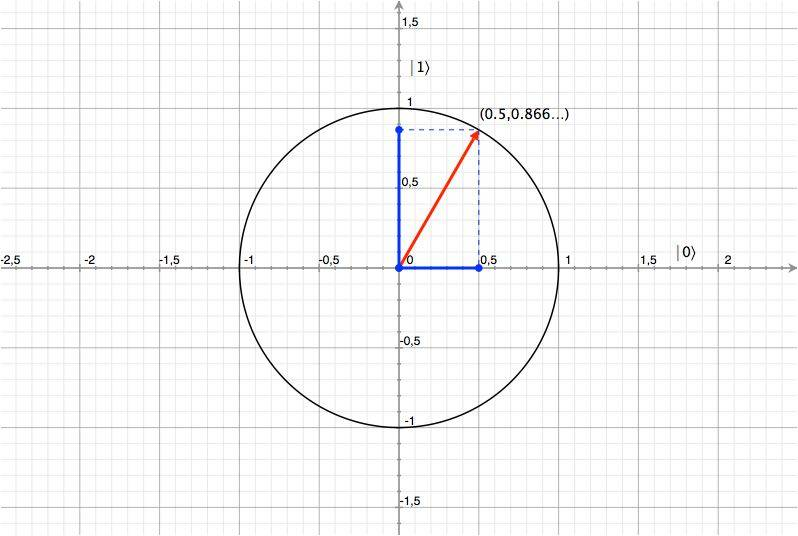

(توی این عکس فرض شده $\theta = \frac{\pi}{3}$ ه.)

ولی می‌دونستیم که درایه‌های بردار ستونی‌ای که باهاش وضعیت کیوبیت‌مون رو نشون می‌دادیم می‌تونستن مختلط باشن و حالت کلی‌ش به این شکله:

$$ |\psi\rangle = \begin{bmatrix} e^{i\phi_1}\cos{\tfrac{\theta}{2}} \\ e^{i\phi_2}\sin{\tfrac{\theta}{2}} \end{bmatrix} ; \theta, \phi_1, \phi_2 \in {\rm I\!R} $$

اگه ما بخوایم این کیوبیت رو نمایش بدیم، دوتا درایه‌ی مختط داریم که هر کدوم دو بعد می‌خوان، پس آیا به یه نمودار چهاربعدی نیاز داریم؟ 

جواب اینه که خیر، توی مکانیک کوانتوم فاز کلی سیستم یا global phase اهمیت نداره و فقط فاز دوتا بردار پایه نسبت به هم مهم هست، یعنی به این شکل:

$$ |\psi\rangle = e^{i\phi_1} \begin{bmatrix} \cos{\tfrac{\theta}{2}} \\ e^{i\phi_2-\phi_1}\sin{\tfrac{\theta}{2}} \end{bmatrix} = e^{i\phi_1} \begin{bmatrix} \cos{\tfrac{\theta}{2}} \\ e^{i\phi}\sin{\tfrac{\theta}{2}} \end{bmatrix}
\Rightarrow |\psi\rangle = \begin{bmatrix} \cos{\tfrac{\theta}{2}} \\ e^{i\phi}\sin{\tfrac{\theta}{2}} \end{bmatrix}$$

که این‌جا چون ضریب $e^{\phi_1}$ فاز کلی سیستم بود دورش ریختیم و $\phi$ رو هم به صورت $\phi = \phi_2-\phi_1$ تعریف کردیم.

حالا چون فقط به یه پارامتر برای نشون دادن قسمت مختلط کیوبیت‌مون نیاز داریم، چون تونستیم بیاریمش توی ۳ بعد، می‌تونیم با موجودی به اسم کره‌ی بلاخ یا Bloch Sphere به صورت زیر نشونش بدیم:

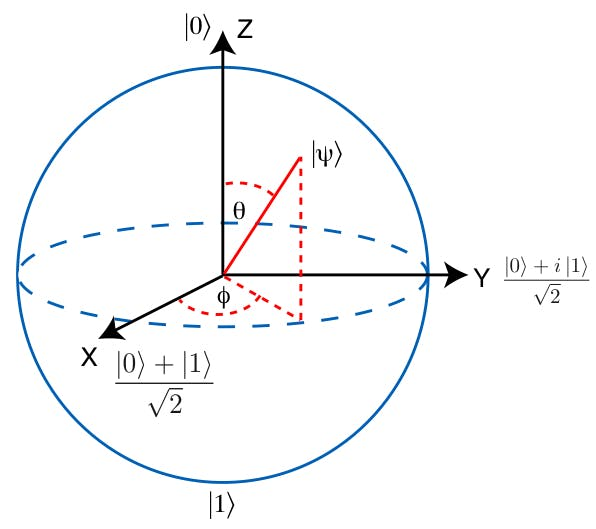

## ۱. گیت‌های پائولی  (Pauli)


### ۱.۱. گیت X پائولی


$$ X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} = |0\rangle\langle1| + |1\rangle\langle0| $$

برای دیدن تاثیر یه گیت روی یه کیوبیت، از تاثیرش روی پایه‌های برداری استفاده می‌کنیم، می‌دونیم که می‌تونیم حالت کلی یه کیوبیت رو به صورت زیر بنویسیم:

$$ |\psi\rangle = \cos{\tfrac{\theta}{2}}|0\rangle + e^{i\phi}\sin{\tfrac{\theta}{2}}|1\rangle $$

پس دونستن تاثیر یه گیت روی این دوتا پایه‌ی $ |0\rangle \space $ و $ \space |1\rangle $ برامون کافیه. به عنوان مثال: 

$$ X|0\rangle = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix} = |1\rangle$$

<!-- یا به طور معادل:

$$
X|0\rangle = ( |0\rangle\langle1| + |1\rangle\langle0| ) \space |0\rangle = |0\rangle\langle1|0\rangle + |1\rangle\langle0|0\rangle = 1 \cdot |1\rangle
$$
 -->

<!--- Beware editing things inside <details> tags as it easily breaks when the notebook is converted to html --->
<details>
 <summary>یادآوری: ضرب ماتریسی (برای دیدنش این‌جا رو کلیک کنید)</summary>
   
  <p> به ضرب ماتریسی می‌شه به عنوان یه Generalization از ضرب داخلی نگاه کرد. در مورد ضرب یه ماتریس در یه بردار، جواب همیشه یه برداره.
  $$ M|v\rangle  = \begin{bmatrix}a & b \\ c & d \\\end{bmatrix}\begin{bmatrix}v_0 \\ v_1 \\\end{bmatrix}
                = \begin{bmatrix}a\cdot v_0 + b \cdot v_1 \\ c \cdot v_0 + d \cdot v_1\end{bmatrix} $$
  توی محاسبات کوانتومی، ما می‌تونیم ماتریس‌هامونو بر اساس بردارهای پایه بنویسیم:
  $$X = |0\rangle\langle1| + |1\rangle\langle0|$$
  این جور نوشتنش خیلی وقتا می‌تونه دیدن نتیجه‌ی محاسبات‌مون رو برامون آسون کنه.
  $$
      \begin{aligned}
      X|1\rangle & = (|0\rangle\langle1| + |1\rangle\langle0|)|1\rangle \\
                 & = |0\rangle\langle1|1\rangle + |1\rangle\langle0|1\rangle \\
                 & = |0\rangle \times 1 + |1\rangle \times 0 \\
                 & = |0\rangle
      \end{aligned}
  $$
  وقتی ما ضرب یه برا و یه کت رو به این صورت می‌بینیم:
  $$ |a\rangle\langle b| $$
  بهش می‌گن ضرب خارجی، که از قانون زیر تبعیت می‌کنه:
  $$
      |a\rangle\langle b| = 
      \begin{bmatrix}
              a_0 b_0 & a_0 b_1 & \dots  & a_0 b_n\\ 
              a_1 b_0 & \ddots  &        & \vdots \\
              \vdots  &         & \ddots & \vdots \\
              a_n b_0 & \dots   & \dots  & a_n b_n \\
      \end{bmatrix}
  $$
  ما می‌بینیم که این محاسبه دقیقا به همون گیت X پائولی که می‌خواستیم منجر می‌شه.
  $$
      |0\rangle\langle1| + |1\rangle\langle0| = 
      \begin{bmatrix}0 & 1 \\ 0 & 0 \\\end{bmatrix} +
      \begin{bmatrix}0 & 0 \\ 1 & 0 \\\end{bmatrix} = 
      \begin{bmatrix}0 & 1 \\ 1 & 0 \\\end{bmatrix} = X
  $$
</details>

توی Qiskit ما می‌تونیم این رو با یه مدار ساده تایید کنیم.

[**نکته:** حواس‌تون باشه که توی Qiskit، وقتی یه مدار جدید می‌سازیم، کیوبیت‌هاش  به طور پیش‌فرض همون اول توی وضعیت $ |0\rangle $ هستن.]

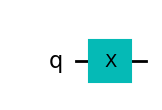

In [10]:
# Let's do an X-gate on a |0> qubit
qc = QuantumCircuit(1)
qc.x(0)
qc.draw(output="mpl")

با تابع `get_statevector` که بالای صفحه نوشتیم می‌تونیم مدار کوانتومی‌مون رو روی کامپیوتر کلاسیکی که دست‌مونه شبیه‌سازی کنیم.

In [11]:
state = get_statevector(qc)

نتیجه‌ی اجرای این مدار رو به صورت بردار نهایی کیوبیت‌مون و روی کره‌ی بلاخ ببینیم:

In [12]:
state_vertical = state.reshape(2, 1)
array_to_latex(state_vertical, prefix="|\\psi\\rangle = ")

<IPython.core.display.Latex object>

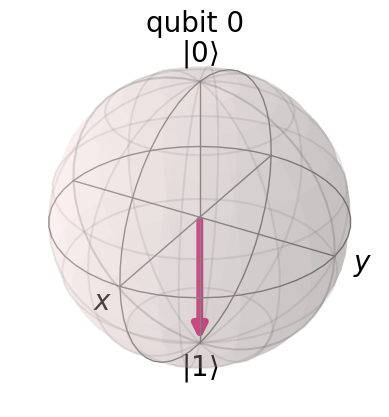

In [13]:
plot_bloch_multivector(state)

 می‌بینیم که کیوبیت‌مون به وضعیت $|1\rangle$ رفت. می‌تونیم این‌طوری فکر کنیم که $\pi$ رادیان حول محور x کره‌ی بلاخ‌مون دوران‌ش دادیم. این گیت $X$ برامون یه‌جورایی معادل همون $NOT$ کلاسیکه.
 
 برای بیش‌تر آشنا شدن با کره‌ی بلاخ و کار کردن با یه نسخه‌ی interactive ازش می‌تونید [این‌جا](https://javafxpert.github.io/grok-bloch/) رو ببینید.

## نکته: شروع از وضعیتی غیر از $ |0\rangle $ و اندازه‌گیری

بعضی وقت‌ها می‌خوایم کیوبیت‌های مدارمون از یه وضعیت خاصی شروع به کار کنن و نمی‌خوایم خودمون رو درگیر ساختن وضعیت اولیه‌ش با استفاده از گیت‌ها بکنیم، با استفاده از دستورهای زیر توی Qiskit، می‌تونید وضعیت اولیه کیوبیت‌هاتون رو دستی تعیین کنید.

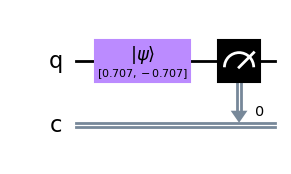

In [14]:
initial_state = [1/sqrt(2), -1/sqrt(2)]
# Initialize our qubit and measure it
qc = QuantumCircuit(1,1)
qc.initialize(initial_state, 0)
qc.measure(0, 0)  # measure qubit 0 to classical bit 0
qc.draw(output="mpl")

## نکته: نمایش وضعیت نهایی مدار

توی Qiskit، ما می‌تونیم به چند روش مختلف وضعیت کیوبیت‌هامون در انتهای مدار رو ببینیم. 

یکیش همینه که دیدین، وضعیت کیوبیت‌ها رو به صورت بردار می‌گیریم و روی کره‌ی بلاخ نشونش می‌دیم.

روش دومش هم اینه که یک مدار که تهش کیوبیت‌هاش رو اندازه‌گیری کردیم رو چندین‌بار اجرا کنیم و تهش یه Histogram روی مقدارهای مختلفی که اندازه‌گیری کردیم بکشیم.

توی سلول پایینی، دقیقا همین کار رو برای آخرین مداری که درست کردیم انجام می‌دیم.

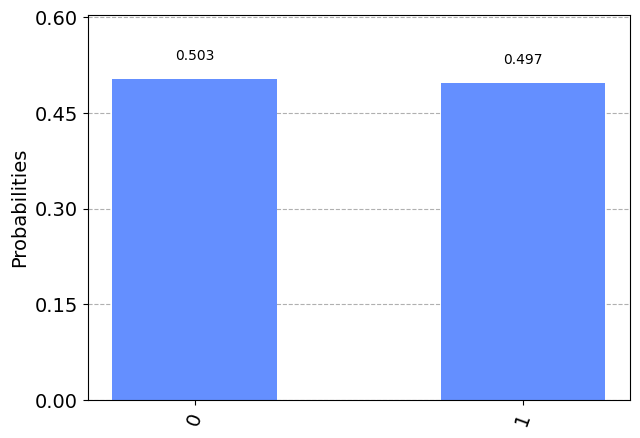

In [15]:
qobj = assemble(qc)  # Assemble circuit into a Qobj that can be run
counts = sim.run(qobj).result().get_counts()  # Do the simulation, returning the state vector
plot_histogram(counts)  # Display the output on measurement of state vector


### ۲.۱. گیت‌های Y و Z
مشابه گیت X، ماتریس‌های پائولی Y و Z هم به عنوان گیت‌های Y و Z توی مدارهای کوانتومی ما عمل می‌کنن.


$$ Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} \quad\quad\quad\quad Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} $$

$$ Y = -i|0\rangle\langle1| + i|1\rangle\langle0| \quad\quad Z = |0\rangle\langle0| - |1\rangle\langle1| $$

و اون‌ها هم معادل $\pi$ رادیان دوران حور محورهای y و z هستن.

حالا برای یه دست‌گرمی ساده، خودتون گیت‌های Y و Z رو روی یه مدار تک کیوبیتی اجرا کنید و نتیجه‌ش رو ببینید. 

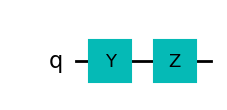

In [16]:
qc = QuantumCircuit(1)
qc.y(0) # Do Y-gate on qubit 0
qc.z(0) # Do Z-gate on qubit 0
qc.draw(output="mpl")

In [17]:
state = get_statevector(qc)

In [18]:
state_vertical = state.reshape(2, 1)
array_to_latex(state_vertical, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

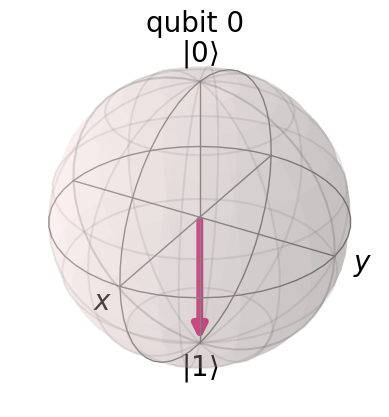

In [19]:
plot_bloch_multivector(state)


## ۲. گیت Hadamard

 گیت Hadamard یکی از گیت‌های خیلی مهم توی محاسبات کوانتومی‌ه و با اجرا شدن روی یه کیوبیت، اون رو به یه Superposition از $|0\rangle$ و $|1\rangle$ می‌بره.
 
 نمایش ماتریسی‌ش هم به این شکله:

$$ H = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} $$

این زیر هم می‌بینیم که اعمالش روی پایه‌های برداری‌مون چه نتیجه‌ای می‌ده.

$$ H|0\rangle = |+\rangle = \tfrac{1}{\sqrt{2}} |0\rangle + \tfrac{1}{\sqrt{2}} |1\rangle $$

$$ H|1\rangle = |-\rangle = \tfrac{1}{\sqrt{2}} |0\rangle - \tfrac{1}{\sqrt{2}} |1\rangle $$

### تمرین 💡 

    
۱. گیت H رو به صورت یه ضرب خارجی بر اساس بردارهای $|0\rangle$ و $|1\rangle$  بنویسید.

In [ ]:
# ENTER CODE FOR Q1 HERE

$$ H = \frac{1}{\sqrt{2}} \big( (|0\rangle + |1\rangle) \langle 0| + (|0\rangle - |1\rangle) \langle 1| \big)$$

۲. فرض کنید یه مداری داریم که این ترتیب از گیت‌ها رو روی یه کیوبیت اعمال می‌کنه: $H^\dagger ZH$. اعمال این ترتیب روی هر کیوبیتی 
معادل اجرای یکی از گیت‌های پائولی‌ه. کدش رو بزنید و پیدا کنید معادل کدوم گیت پائولی‌ه.

In [ ]:
# ENTER CODE FOR Q2 HERE
qc_1 = QuantumCircuit(1)

# We know $H^{\dagger} = H$ 
qc_1.h(0)
qc_1.z(0)
qc_1.h(0)

state_1 = get_statevector(qc_1)

qc_2 = QuantumCircuit(1)

qc_2.x(0)

state_2 = get_statevector(qc_2)

state_1 == state_2


می‌دونیم که $H^\dagger = H$,  $$ X = HZH $$

در حالت عادی از پایه Z شروع می‌کنیم، گیت H پایه‌مون رو به پایه X می‌بره و گیت Z یه عملگرد NOT توی پایه X اعمال می‌کنه و آخرین گیت H ما رو به پایه Z برمی‌گردونه. ما می‌تونیم با محاسبه ماتریسش صحت این گزاره رو تایید کنیم.

$$
HZH =
\tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
\begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}
\tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
=
\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}
=X
$$


۳. مثل سوال قبل، یه ترکیب با استفاده از گیت‌های X ،Z و H پیدا کنید که معادل اجرای یه گیت Y باشه. (با چشم‌پوشی از فاز/ضریب کلی)

In [ ]:
# ENTER CODE FOR Q3 HERE

qc_1 = QuantumCircuit(1)

# We know $H^{\dagger} = H$ 
qc_1.x(0)
qc_1.z(0)

state_1 = get_statevector(qc_1)

qc_2 = QuantumCircuit(1)

qc_2.y(0)

state_2 = get_statevector(qc_2)

state_1 == -1j * state_2

$$ XZ = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} = \begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix} = -i \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} = -iY $$

## ۳. گیت U  یا $U_3$

گیت U کلی‌ترین حالت تمامی گیت‌های تک-کیوبیتی‌ه که پارامترهایی بدین شکل داره:

$$
U(\theta, \phi, \lambda) = \begin{bmatrix} \cos(\frac{\theta}{2}) & -e^{i\lambda}\sin(\frac{\theta}{2}) \\
            e^{i\phi}\sin(\frac{\theta}{2}) & e^{i(\phi+\lambda)}\cos(\frac{\theta}{2})
     \end{bmatrix}
$$

به عنوان مثال:

$$
\begin{aligned}
U(\frac{\pi}{2}, 0, \pi) = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\
            1 & -1
     \end{bmatrix} = H
& \quad &
U(\pi, -\frac{\pi}{2}, \frac{\pi}{2}) = \begin{bmatrix} 0 & 1 \\
            1 & 0\\
     \end{bmatrix} = X
\end{aligned}
$$

به عنوان یه تمرین کوچیک دیگه هم می‌تونید با استفاده از تعریف ماتریس یکانی، تایید کنید که گیت U (که بعضا بهش U3 هم می‌گن، چون ۳تا پارامتر داره) یه ماتریس یکانیه.

توی سلول زیر هم می‌تونید برای خودتون به گیت U پارامترهای مختلف بدید تا بیش‌تر باهاش آشنا شید.

In [ ]:
qc = QuantumCircuit(1)
# Last parameter is the target qubit
theta, phi, lambda_ = 0, 0, 0
qc.u(theta, phi, lambda_, 0)
qc.draw(output="mpl")

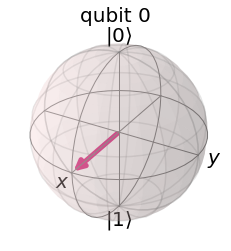

In [15]:
# Let's see the result
state = get_statevector(qc)
plot_bloch_multivector(state)

### ۱.۱ دوران حول محورهای مختلف:

با دادن پارامترهای مشخصی به ماتریس $U$ مون، می‌تونیم ماتریس‌های کلی دوران حول محورهای $X, Y, Z$ رو بسازیم.  

داریم:

$$ \newcommand{\th}{\frac{\theta}{2}} R_X(\theta) = exp(-i \th X) = \begin{bmatrix} \cos{\th}   & -i\sin{\th} \\ -i\sin{\th} & \cos{\th}\end{bmatrix}$$

$$R_Y(\theta) = exp(-i \th Y) = \begin{bmatrix} \cos{\th} & -\sin{\th} \\ \sin{\th} & \cos{\th} \end{bmatrix} $$

$$ R_Z(\lambda) = exp(-i\frac{\lambda}{2}Z) = \begin{bmatrix} e^{-i\frac{\lambda}{2}} & 0 \\ 0 & e^{i\frac{\lambda}{2}} \end{bmatrix} $$

به سادگی می‌بینیم که:

$$ U_3(\theta, -\frac{\pi}{2}, \frac{\pi}{2}) = R_X(\theta) $$

$$ U_3(\theta, 0, 0) = R_Y(\theta) $$

#### تمرین ساده
سعی کنید گیت $R_Z$ رو به صورت یه حالت خاص از گیت $U_3$ بنویسید.

برای گیت $R_Z$ با یه مقدار محاسبه می‌بینیم که:

$$ \newcommand{\la}{\frac{\lambda}{2}} R_Z(\lambda) = \begin{bmatrix} e^{-i\la} & 0 \\ 0 & e^{i\la} \end{bmatrix} = e^{-i\la} \begin{bmatrix} 1 & 0 \\ 0 & e^{i\lambda} \end{bmatrix} = U_3(2\pi, 0, \lambda) $$